# K- Nearest Neighbors
# Classification with KNN

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
bank_data = pd.read_csv("Bank.csv")
bank_data.head() # y ---> 0 means the client did not subscribe to a term deposit.

,age,duration,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,210,1.4,93.444,-36.1,4.963,5228.1,0
1,53,138,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,339,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,185,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,137,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
x = bank_data.iloc[:, :7]   # Good practice converting into an array, for 1 column we should conert into two dimensional array
y = bank_data.iloc[:, 7]   # All rows and 0 to 6 columns
print("x:\n---\n", x.head(), "\n")
print("y:\n---\n", y.head())

x:
---
    age  duration  emp_var_rate  cons_price_idx  cons_conf_idx  euribor3m  \
0   44       210           1.4          93.444          -36.1      4.963   
1   53       138          -0.1          93.200          -42.0      4.021   
2   28       339          -1.7          94.055          -39.8      0.729   
3   39       185          -1.8          93.075          -47.1      1.405   
4   55       137          -2.9          92.201          -31.4      0.869   

   nr_employed  
0       5228.1  
1       5195.8  
2       4991.6  
3       5099.1  
4       5076.2   

y:
---
 0    0
1    0
2    1
3    0
4    1
Name: y, dtype: int64


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Let train a model choosing k =6 arbitrary

In [6]:
knncl = KNeighborsClassifier(n_neighbors = 6)

In [7]:
knncl.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [8]:
y_pred = knncl.predict(x_test)

In [9]:
accuracy_score(y_test, y_pred)

0.8988832240835154

In [13]:
confusion_matrix(y_test, y_pred) # Rows - actual , Columns - predictions, To get clear idea use heatmap

array([[7080,  245],
       [ 588,  325]])

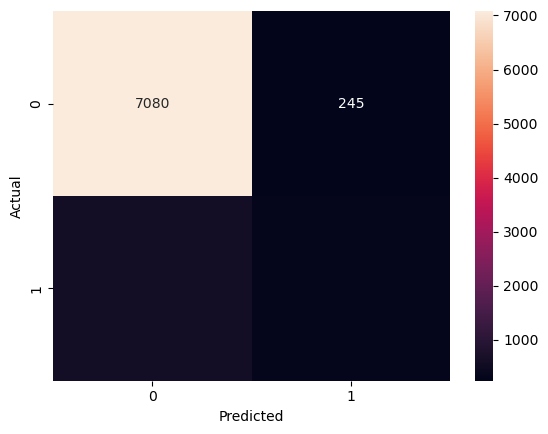

In [16]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = "g")   # annot give scientific notaion, 7.2e+03 means 7.2 * 10^3
plt.xlabel("Predicted")                                                  # To see original values use fmt as g
plt.ylabel("Actual")
plt.show()

### Let find best K value using **Hyper perameter optimization**

* here,
  
        knncl = KNeighborsClassifier(n_neighbors = k) --> "k" is a hyper perameter, before training a model we must estimate "k", to do it here we use Cross validation.

In [12]:
K_list = range(1, 11)
Errors = []

for k in K_list:
    knncl = KNeighborsClassifier(n_neighbors = k)
    cvals = 1-cross_val_score(knncl, x_train, y_train, cv = 10, scoring = "accuracy")   # taking 10 cvals scores(MSE) of accuracy
    print(cvals)
    Errors.append(cvals.mean())   # let get the mean of cvals bcs we will get 10 vals

'''In the context of cross-validation, the "scoring" parameter refers to the metric used to evaluate the performance of a machine learning 
model on each fold of the cross-validation process. It specifies what aspect of the model's predictions should be measured and reported.

The choice of scoring metric depends on the specific task (classification, regression, etc.) and the goals of the analysis. Some common 
scoring metrics used in cross-validation include:

    Classification Metrics:
        Accuracy: Proportion of correctly classified instances.
        Precision: Proportion of true positive predictions among all positive predictions.
        Recall: Proportion of true positive predictions among all actual positive instances.
        F1-score: Harmonic mean of precision and recall.
        ROC AUC: Area under the Receiver Operating Characteristic curve.
        etc.

    Regression Metrics:
        Mean Absolute Error (MAE): Average of the absolute differences between predictions and actual values.
        Mean Squared Error (MSE): Average of the squared differences between predictions and actual values.
        Root Mean Squared Error (RMSE): Square root of the MSE.
        R-squared (R^2): Proportion of the variance in the dependent variable that is predictable from the independent variables.
        etc.'''

[0.11411229 0.11289833 0.11593323 0.11229135 0.12655539 0.12169954
 0.10743551 0.12048558 0.12959029 0.11532625]
[0.10500759 0.10561457 0.10713202 0.10227618 0.11107739 0.10713202
 0.10106222 0.10834598 0.11259484 0.10257967]
[0.10591806 0.10257967 0.10288316 0.10106222 0.10834598 0.10682853
 0.10257967 0.1047041  0.11047041 0.1047041 ]
[0.10015175 0.09863429 0.10379363 0.09742033 0.10713202 0.10652504
 0.09863429 0.10075873 0.10713202 0.09893778]
[0.09893778 0.09468892 0.0983308  0.09468892 0.10379363 0.10318665
 0.09863429 0.10500759 0.10955994 0.10106222]
[0.09165402 0.09559939 0.09863429 0.09742033 0.10197269 0.10500759
 0.09802731 0.09924127 0.10379363 0.09499241]
[0.09135053 0.09317147 0.09711684 0.09074355 0.10197269 0.10379363
 0.09499241 0.10318665 0.10440061 0.092261  ]
[0.09104704 0.0952959  0.09438543 0.09499241 0.09893778 0.10257967
 0.09347496 0.10197269 0.10500759 0.09377845]
[0.092261   0.09165402 0.09468892 0.08983308 0.10106222 0.10197269
 0.09256449 0.10106222 0.1001

'In the context of cross-validation, the "scoring" parameter refers to the metric used to evaluate the performance of a machine learning model on each fold of the cross-validation process. It specifies what aspect of the model\'s predictions should be measured and reported.\n\nThe choice of scoring metric depends on the specific task (classification, regression, etc.) and the goals of the analysis. Some common scoring metrics used in cross-validation include:\n\n    Classification Metrics:\n        Accuracy: Proportion of correctly classified instances.\n        Precision: Proportion of true positive predictions among all positive predictions.\n        Recall: Proportion of true positive predictions among all actual positive instances.\n        F1-score: Harmonic mean of precision and recall.\n        ROC AUC: Area under the Receiver Operating Characteristic curve.\n        etc.\n\n    Regression Metrics:\n        Mean Absolute Error (MAE): Average of the absolute differences between p

In [46]:
print(Errors)

[0.11790591805766311, 0.10631259484066766, 0.10503793626707132, 0.10191198786039454, 0.1006980273141123, 0.09860394537177543, 0.097298937784522, 0.09717754172989379, 0.09553869499241274, 0.09666160849772384]


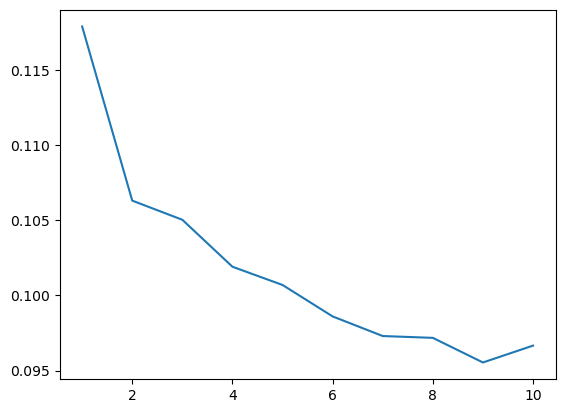

In [47]:
plt.plot(K, Errors)
plt.show()

### After 9 again error is increasing bcs model is overfiting, so choose 9 as optimum K value
### New model with optimum K value

In [48]:
knncl = KNeighborsClassifier(n_neighbors = 9)
knncl.fit(x_train, y_train)
y_pred = knncl.predict(x_test)
accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[7002,  323],
       [ 471,  442]], dtype=int64)

# Regression with KNN
let choose k = 5 arbitrary

In [18]:
boston_data = pd.read_csv("Boston.csv")
boston_data.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [19]:
x = boston_data.iloc[:, :12]   # Good practice converting into an array, for 1 column we should conert into two dimensional array
y = boston_data.iloc[:, 12]
print("x:\n---\n", x.head(), "\n")
print("y:\n---\n", y.head())

x:
---
       crim    zn  indus    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33   

y:
---
 0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [26]:
knnrg = KNeighborsRegressor(n_neighbors = 5)   # If you need use cross validation for  optimum k

In [22]:
knnrg.fit(x_train, y_train)

KNeighborsRegressor()

In [23]:
y_pred_rg = knnrg.predict(x_test)

In [24]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred_rg))
print(RMSE)

7.1685161316280634
